1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [209]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt

N = 1000

x1 = np.random.normal(0,1,N)
x2 = np.random.normal(0,3,N) + x1
x3 = 2*x1+x2

data = np.array([x1,x2,x3])
data

array([[ -2.62941252,  -1.10482131,   1.12992813, ...,  -0.15188053,
         -0.36311381,   0.40399749],
       [ -6.13252518,  -2.57976763,  -3.37704778, ...,  -4.79089082,
         -4.11962455,   0.97845662],
       [-11.39135023,  -4.78941026,  -1.11719153, ...,  -5.09465188,
         -4.84585217,   1.78645159]])

In [210]:
# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

# the covariance matrix
cov_m = np.cov(data)

# now find the eigenvectors of the covariance matrix..
l, V = la.eig(cov_m)
i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

# Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
U, spectrum, Vt = np.linalg.svd(data)

l_svd = spectrum**2/(N-1)
V_svd = U

i = l_svd.argsort()[::-1]
l_svd = l_svd[i]
V_svd = V_svd[:,i]

print ("eigendecomposition:",l)
print ("SVD:",l_svd)

print ("eigendecomposition:",V)
print ("SVD:",V_svd)

print("The two procedures yield the same result for the first two eigenvalues")

eigendecomposition: [2.85702427e+01+0.j 2.19876578e+00+0.j 1.63169136e-15+0.j]
SVD: [2.85756600e+01 2.20104985e+00 5.34730182e-32]
eigendecomposition: [[-0.12048812  0.56463789 -0.81649658]
 [-0.57104924 -0.7122051  -0.40824829]
 [-0.81202548  0.41707068  0.40824829]]
SVD: [[-0.12041281  0.56465395 -0.81649658]
 [-0.57114423 -0.71212893 -0.40824829]
 [-0.81196984  0.41717898  0.40824829]]
The two procedures yield the same result for the first two eigenvalues


The percentual of dataset variability using the principal components is 99.99999999999999%
Given how the dataset is constructed it makes sense since the third component is a linear combination of the first two


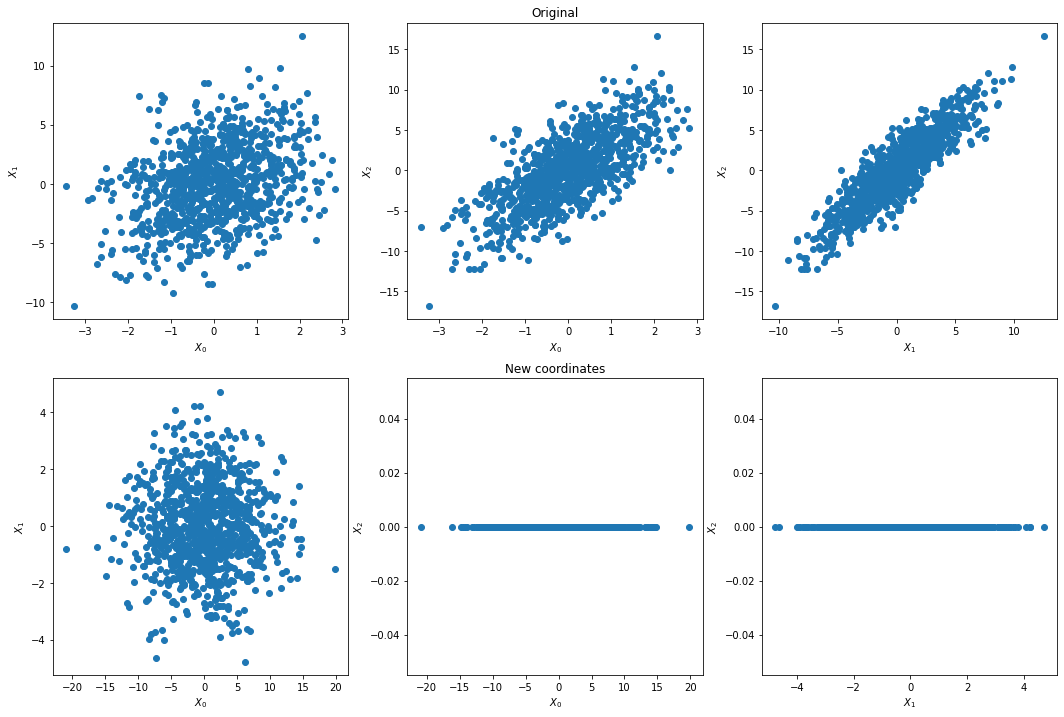

In [212]:
# What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? 
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

p_pc = np.real(np.sum(l[:2])/np.sum(l))*100
print(f"The percentual of dataset variability using the principal components is {p_pc}%")
print("Given how the dataset is constructed it makes sense since the third component is a linear combination of the first two")

# Redefine the data in the basis yielded by the PCA procedure
V_pc = V[:,:2]
data_pc = np.dot(V_pc.T, data)
data_pc = np.vstack([data_pc, np.zeros((1, N))]) 

# Plot the data points in the original and the new coordiantes as a set of scatter plots. 
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize = (18, 12))
axes[0,1].set_title("Original")
axes[1,1].set_title("New coordinates")
idx_data = np.array([[0,1],[0,2],[1,2]])
X = [data, data_pc]

for i in range(n_rows):
    x = X[i]
    for j in range(n_cols):
        idx0 = idx_data[j,0]
        idx1 = idx_data[j,1]
        axes[i,j].scatter(x[idx0,:], x[idx1,:])
        axes[i,j].set_xlabel("$X_"+str(idx0)+"$")
        axes[i,j].set_ylabel("$X_"+str(idx1)+"$")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [213]:
N = 1000
n = [np.random.randn(N)/50 for i in range(10)] 

data = np.vstack([data, n[0], n[1], n[2], n[3], n[4], n[5], n[6], n[7], n[8], n[9]])
data

array([[-2.62941252e+00, -1.10482131e+00,  1.12992813e+00, ...,
        -1.51880531e-01, -3.63113809e-01,  4.03997487e-01],
       [-6.13252518e+00, -2.57976763e+00, -3.37704778e+00, ...,
        -4.79089082e+00, -4.11962455e+00,  9.78456616e-01],
       [-1.13913502e+01, -4.78941026e+00, -1.11719153e+00, ...,
        -5.09465188e+00, -4.84585217e+00,  1.78645159e+00],
       ...,
       [-1.68881589e-02,  2.51295296e-03, -2.80090400e-02, ...,
         1.90206085e-02,  1.67393680e-03, -4.81038143e-02],
       [ 1.86367891e-02,  5.68020631e-03, -5.58524989e-04, ...,
         1.95163238e-02, -8.20994361e-03, -8.63321186e-03],
       [ 6.62555469e-03,  2.26518139e-02,  2.55610064e-03, ...,
         1.11052375e-02, -7.99322988e-03,  2.13312609e-02]])

In [214]:
# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

# the covariance matrix
cov_m = np.cov(data)

# now find the eigenvectors of the covariance matrix..
l, V = la.eig(cov_m)
i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

# Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
U, spectrum, Vt = np.linalg.svd(data)

l_svd = spectrum**2/(N-1)
V_svd = U

i = l_svd.argsort()[::-1]
l_svd = l_svd[i]
V_svd = V_svd[:,i]

print ("eigendecomposition:",l)
print ("SVD:",l_svd)

print ("eigendecomposition:",V)
print ("SVD:",V_svd)

print("The two procedures yield very similar results except for the last eigenvalue")

eigendecomposition: [2.85702441e+01+0.j 2.19877020e+00+0.j 4.46563455e-04+0.j
 4.27065013e-04+0.j 4.02436909e-04+0.j 3.95469191e-04+0.j
 3.81457521e-04+0.j 3.70030693e-04+0.j 3.48627233e-04+0.j
 3.39398651e-04+0.j 3.34765871e-04+0.j 3.17903420e-04+0.j
 7.53475741e-16+0.j]
SVD: [2.85756614e+01 2.20105419e+00 4.48818690e-04 4.28800115e-04
 4.02453047e-04 3.95873266e-04 3.82651875e-04 3.70511040e-04
 3.49389796e-04 3.39679190e-04 3.35473793e-04 3.17920614e-04
 5.30507132e-32]
eigendecomposition: [[-1.20488112e-01 -5.64637339e-01  1.80718902e-05  4.57075475e-04
  -2.84922177e-04  6.90073341e-05  1.30697694e-04  4.85993752e-04
   1.57698693e-04  1.15956943e-06  6.04441949e-06  2.25156866e-04
   8.16496581e-01]
 [-5.71049232e-01  7.12204298e-01 -6.09593055e-05 -6.67285787e-04
   3.96199050e-04 -1.24841217e-04 -9.85318188e-05 -5.86738904e-04
  -2.59143814e-04 -1.40806826e-05  4.70019983e-05 -3.16464156e-04
   4.08248290e-01]
 [-8.12025456e-01 -4.17070379e-01 -2.48155251e-05  2.46865163e-04
  

The percentual of dataset variability using the 2 principal components is 99.98776932666361%
The percentual of dataset variability using the 12 principal components is 100.0%


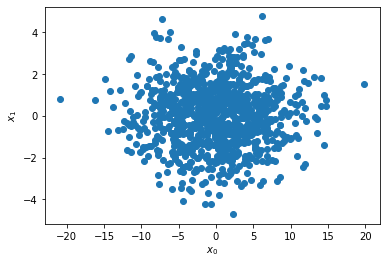

In [215]:
p_pc2 = np.real(np.sum(l[:2])/np.sum(l))*100
p_pc12 = np.real(np.sum(l[:12])/np.sum(l))*100
print(f"The percentual of dataset variability using the 2 principal components is {p_pc2}%")
print(f"The percentual of dataset variability using the 12 principal components is {p_pc12}%")

# Redefine the data in the basis yielded by the PCA procedure
V_pc = V[:,:2]
data_pc = np.dot(V_pc.T, data)

# scatter plot for the first two principal components as in the exercise before
plt.figure()
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(data_pc[0,:], data_pc[1,:])

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [167]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P .
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P . 

--2020-11-25 00:44:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘./magic04.data’

magic04.data        100%[===================>]   1,41M  1,13MB/s    in 1,2s    

2020-11-25 00:44:04 (1,13 MB/s) - ‘./magic04.data’ saved [1477391/1477391]

--2020-11-25 00:44:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [applica

eigendecomposition: [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]
eigendecomposition: [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-

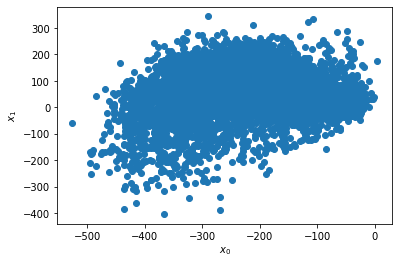

In [206]:
import csv
import pandas as pd

data = pd.read_csv("magic04.data", header=None, usecols=np.r_[0:10])
data = data.T

# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov_m = np.cov(data)

# now find the eigenvectors of the covariance matrix..
l, V = la.eig(cov_m)
i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

print ("eigendecomposition:",l)
print ("eigendecomposition:",V)

p_pc2 = np.real(np.sum(l[:2])/np.sum(l))*100
p_pc6 = np.real(np.sum(l[:6])/np.sum(l))*100
print(f"The percentual of dataset variability using the 2 principal components is {p_pc2}%")
print(f"The percentual of dataset variability using the 6 principal components is {p_pc6}%")

# Redefine the data in the basis yielded by the PCA procedure
V_pc = V[:,:2]
data_pc = np.dot(V_pc.T, data)

# scatter plot for the first two principal components 
plt.figure()
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(data_pc[0,:], data_pc[1,:])